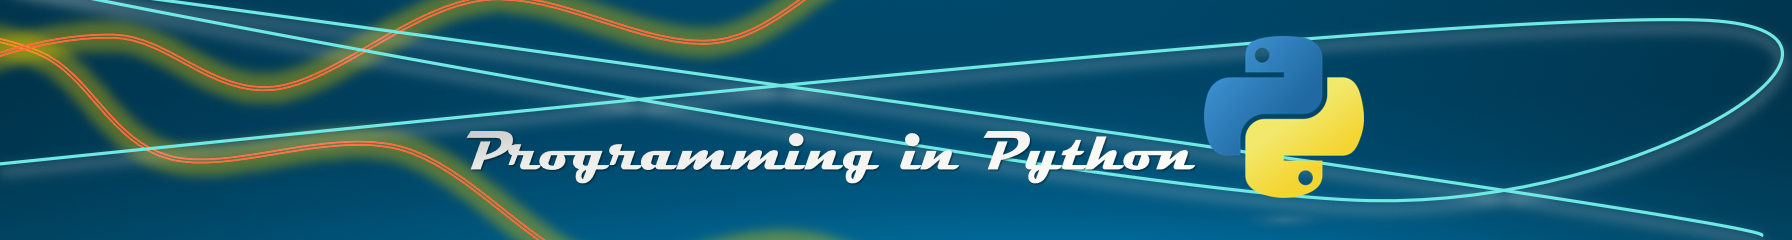

<h1 style="color:Crimson;">Practical 04: Error Handling, Testing, I/O, and Data Files</h1>

Dr. Todd Jones

[t.r.jones@reading.ac.uk](mailto:t.r.jones@reading.ac.uk)

**Department of Computer Science**

---

Follow the instructions to complete each of these tasks.

This set of exercises focuses on writing basic Python code and exploring the use of exceptions, code testing, I/O, and Data Files.

This work is not assessed but will help you gain practical experience for the coursework.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Exceptions</h2>

Below is a function that performs simple division in Python.  Let's try to catch and handle some of the possible **errors**.

In [ ]:
# Define the division function
def myDivide(m, n):
    quotient = m / n
    
    return quotient

---
Attempt to use the `myDivide()` function and print its solution if it is successful, while **catching** a division by zero error within a `try` statement and **printing** a message if it is encountered.  Get the two values from `input()`.  Demonstrate catching the error.

---

### `assert`

Modify your above solution to `assert` that the solution to the division will be **fractional** (i.e., between $-1$ and $1$).  Demonstrate failure.

---
### `raise`

A good use of the `raise` statement in Python for data science is when working with large datasets and you need to ensure that the data meets certain constraints before proceeding with the analysis.

For example, let's say we are working with a dataset of housing prices, and we want to ensure that the prices are all positive numbers. We can use the `raise` statement to `raise` an exception if any **negative prices** are found in the dataset.


In [ ]:
data = {'price': [100, 200, -300, 400, -500]}

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Reading and Writing with a Context Manager</h2>

Use a **parenthesized context manager** to read from one file and write to another simultaneously.

1. Create a text file named `demo_input.txt` containing a few lines of text of your choice.
2. Write code that reads each line from `demo_input.txt`, reverses the line's content, and writes the reversed lines to a demo_output.txt.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Exception Handling & Graceful Degradation in File I/O</h2>

When performing file operations, **errors can occur** for various reasons (e.g., the file does not exist, lack of permissions, or disk issues).  

**Graceful degradation** means your code recovers or fails in a **controlled, user-friendly manner** instead of simply crashing.

Recall:
- Surround at-risk operations (like file opens) with a `try`/`except` to catch and handle potential errors.
- If the desired file is unavailable, create a placeholder file or revert to another default behavior.
- Print helpful messages or log errors so users or developers understand what went wrong.

---
### Exercise 1: Reading a File That Might Not Exist

1. Attempt to open a file called `user_data.txt` in read mode. (**This file does not exist!**)
2. If the file does not exist, catch the exception and:
    - Print a user-friendly message (e.g., "File not found!").
    - Create a new file named `user_data.txt` with default content (like `"user: guest\n"`).
3. Finally, reopen `user_data.txt` in read mode, and print its contents to confirm everything is working.


**Think about:**
- Which **specific exception** to catch for a missing file (e.g., `FileNotFoundError`).
- Ensuring you `close` the file after reading or writing.

<hr style="border:2px solid black"> </hr>
<h3 style="color:Crimson;">Exercise 2: Appending to a Log with Graceful Degradation</h3>

1. Attempt to append a line to a file called `logs.txt`.
    - You will need to create this line of text.
3. If a `PermissionError` (or any I/O error) occurs, catch it and:
    - Print an error message to the user.
    - Attempt to write the log entry to a fallback file named `error_log.txt`.
4. If writing to the fallback also fails, print a final error message and stop.
5. Print a success message if everything works smoothly.

**Think about:**
- Different possible exceptions: `PermissionError`, `IOError`, etc.
- Nested `try`/`except` if you are handling multiple paths of failure.

**Testing functionality:**
- If you write this correctly, the first file should be created automatically.  To test an error on the attempt to append, **change the file permissions to be read-only**.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Reading and Writing to JSON</h2>

Practice writing to a JSON file and reading the result.

1. Create a Python dictionary (e.g., `user_prefs`) with keys for `username`, `color_scheme`, and a `list` of favourite items.
2. Write it to a file named `user_prefs.json`.
3. Read it back in and `print` the resulting dictionary.
4. Add `try`/`except` blocks to handle missing files and malformed JSON.


**Extend**: You can test this behaviour with `pytest` or `unittest` by simulating missing or invalid JSON files.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Reading and Writing to CSV</h2>

1. Locate CSV file named `scores.csv` in the `./data/` directory and inspect its contents.
2. Manually read the CSV file line by line:
    - Parse columns by comma.
    - Print the highest score.
3. Then, read the same file using the `csv` module.
    - Print the name of the person with the highest score.

**Observe how the two approaches differ in code length and convenience.**


**Extend**: Write a small test to ensure the function `parse_csv_scores(filename)` returns a list of `(name, score)` tuples that is longer than 3 rows and with the correct values (assuming the file data is authoritative).

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Simple Pattern Matching (regex)</h2>

**Regular expressions (re, regex)** are sequences of **special characters** that form a **search pattern**, used for matching or manipulating strings.  These patterns help you find specific substrings (like emails, URLs, or phone numbers) or check if a string meets a certain format (like postal codes or log file entries).
- https://docs.python.org/3/library/re.html
- https://docs.python.org/3/howto/regex.html

Python provides the `re` module to work with these.  The process may involve both a `compile` step and a `match` step.  Other operations: `re.search()`, `re.findall(`), and `re.sub()` let you search inside strings, retrieve multiple matches, and replace text.

regex is a great tool for shaping and validating data before or after reading it from files, making it highly relevant for file-based workflows and general input parsing in Python.  In the context of this practical, these can be helpful in the following ways:
- Quickly verify that data from a CSV, JSON file, or user input is formatted correctly (e.g., checking for valid email or date formats).
   When reading text files, logs, or command-line input, regex can help isolate the exact lines or parts of lines.
- Tests can be written that ensure your regex patterns correctly accept valid data and reject invalid data, integrating cleanly with `unittest` or `pytest`.

**Guide:**
| **Pattern**       | **Meaning**                                                             | **Example**                 | **Explanation**                                                                                                                                               |
|-------------------|-------------------------------------------------------------------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `.`               | Matches **any character** except newline                                | `a.b`                       | Matches "aeb", "a b", "a3b", etc.                                                                                                                            |
| `^`               | Matches the **start** of the string (or line, in multiline mode)        | `^Hello`                    | Matches "Hello" only if at the **start** of the string.                                                                                                       |
| `$`               | Matches the **end** of the string (or line, in multiline mode)          | `end$`                      | Matches "end" only if at the **end** of the string.                                                                                                           |
| `[abc]`           | Matches **any single character** `a`, `b`, or `c`                       | `[abc]x`                    | Matches "ax", "bx", "cx", but not "xx".                                                                                                                      |
| `[^abc]`          | Matches **any character** **not** `a`, `b`, or `c`                      | `[^abc]x`                   | Matches "dx", "zx", etc., but not "ax".                                                                                                                       |
| `( )`             | **Groups** a pattern or creates a **capturing group**                   | `(ab)+`                     | Matches "ab", "abab", "ababab", etc.                                                                                                                          |
| `\|` or `\ \|`       | **Alternation** (logical OR)                                            | `cat\|dog`                 | Matches either "cat" or "dog". (Some engines need `\|`; Python regex uses `|` directly: `cat|dog`.)                                                           |
| `?`               | **Zero or one** occurrence of preceding element                         | `colou?r`                  | Matches "color" or "colour".                                                                                                                                 |
| `*`               | **Zero or more** occurrences of preceding element                       | `fo*`                       | Matches "f", "fo", "foo", "fooo", etc.                                                                                                                        |
| `+`               | **One or more** occurrences of preceding element                        | `fo+`                       | Matches "fo", "foo", "fooo", etc.                                                                                                                             |
| `{m,n}`           | Between `m` and `n` repetitions of preceding element                    | `a{2,4}`                    | Matches "aa", "aaa", or "aaaa".                                                                                                                               |
| `\d`              | **Any digit** (equivalent to `[0-9]`)                                   | `\d+`                       | Matches one or more digits, like "123".                                                                                                                       |
| `\D`              | **Any non-digit** character (equivalent to `[^0-9]`)                    | `\D+`                       | Matches one or more non-digit characters, like "abc".                                                                                                         |
| `\w`              | **Word character** (letter, digit, or underscore)                       | `\w+`                       | Matches sequences like "word", "Hello_123".                                                                                                                   |
| `\W`              | **Non-word** character (equivalent to `[^A-Za-z0-9_]`)                  | `\W+`                       | Matches symbols, punctuation, or spaces, etc.                                                                                                                 |
| `\s`              | **Whitespace** (spaces, tabs, newlines)                                 | `\s+`                       | Matches consecutive spaces, tabs, or newlines.                                                                                                                |
| `\S`              | **Non-whitespace** character (equivalent to `[^ \t\n\r\f\v]`)           | `\S+`                       | Matches consecutive non-whitespace characters.                                                                                                                |
| `(?P<name>...)`   | **Named capturing group** (Python-specific extension)                   | `(?P<user>\w+)@example.com` | Captures the part before `@example.com` into a group named "user" (access via `match.group('user')`).                                                         |

---

### Exercise 1: Testing specific patterns

1. **Write a regex pattern** that checks for lines that start with a **digit** and end with a period (`.`).
2. Test it on a small list of strings:
```python
test_strings = [
    "1. Hello.",
    "Abc.",
    "2. Another line.",
    "99A. Not quite right",
    "3. Ends with period.",
    ". Starts with period",
    "4. This should pass.",
    "No digit first."
]
```
3. **Print** which strings match and which do not.

---
### Exercise 2: Validating email addresses

Write a small loop that uses `re.match(pattern, email)` to check each item in the list:
```python
emails = [
    "test@example.com",           # valid (basic)
    "john.doe@domain.org",        # valid (includes dot in local-part)
    "USER@EXAMPLE.COM",           # valid (uppercase letters)
    "user_name+test@example.co.uk", # valid (plus sign, multiple domain levels)
    "invalid@ex@ample",           # invalid (multiple '@')
    "@missinglocal.com",          # invalid (missing local part)
    "nodomain@",                  # invalid (missing domain)
    "abc",                        # invalid (no '@' or TLD)
    "double..dot@domain.com",     # invalid (double dot in local part is questionable)
    "leadingdot.@example.com",    # invalid (dot immediately before '@')
    "trailingdot@example.com.",   # invalid (ends with a dot in the domain)
    "spaces inside@example.com",  # invalid (spaces not allowed in local-part or domain)
    "user@@example.com",          # invalid (extra '@' symbol)
    "no-tld@example",             # invalid (no TLD after the dot)
]
```

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Exploring `argparse`</h2>

To use `argparse` in a notebook, where no meaningful arguments are being passed, we can use `sys.argv` as an object to hold dummy arguments to test.

1. Create a small `argparse` script snippet for use in a notebook cell.
2. Add a `--verbose` flag to print extra debug info if set.
3. Show how it works with a sample `sys.argv` assignment:
```python
sys.argv = ["demo_script.py", "--verbose"]
```
4. Use an `if`/`else` block to print a longer message if the argument flag is present.